<a href="https://colab.research.google.com/github/spshreya/pytorch_practice/blob/main/PyTorch_01_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pytorch Workflow

exploring the workflow of pytorch

Covering:
* data (prepare and load)
* Build model
* fitting the model to data (training)
* making predictions and evaluating (inference)
* saving and loading the model
* setting it all together

In [7]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

### Data Preparing and Loading

MAchine learning is a game of 2 parts:

1. get data into a numerical encoding
2. build a model to learn patterns and data

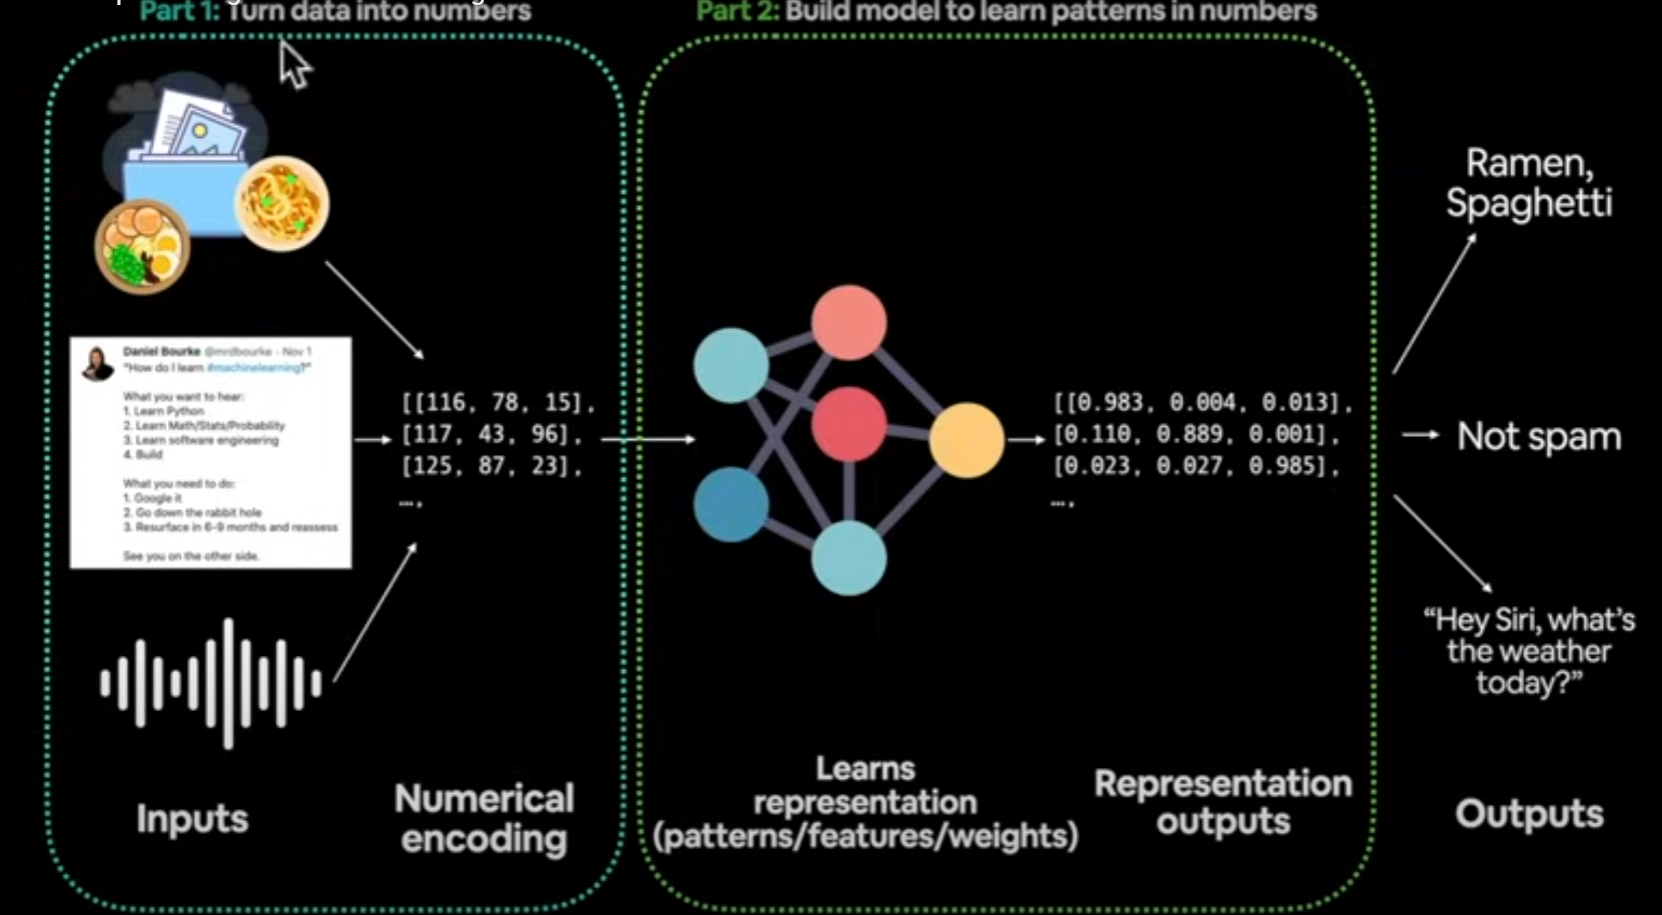

In [8]:
##Create *known* parameters   (for linear regression)

weight = 0.7
bias = 0.3

#Create
start =0
end = 1
step = 0.02
X=torch.arange(start, end ,step).unsqueeze(dim=1)  #adding extra square bracket or dimension
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [9]:
len(X), len(y)

(50, 50)

### Splitting the data

In [10]:
#create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [11]:
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=None):
  """Plots training data, test data and compares predictions
  """

  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data,train_labels, c="b", s=4, label="Training data")

  #Plot test data in grenn
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there any predictions?
  if predictions is not None:
    #Plot the predicitions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label ="Predictions")

  #Show the legend
  plt.legend(prop={"size":14});

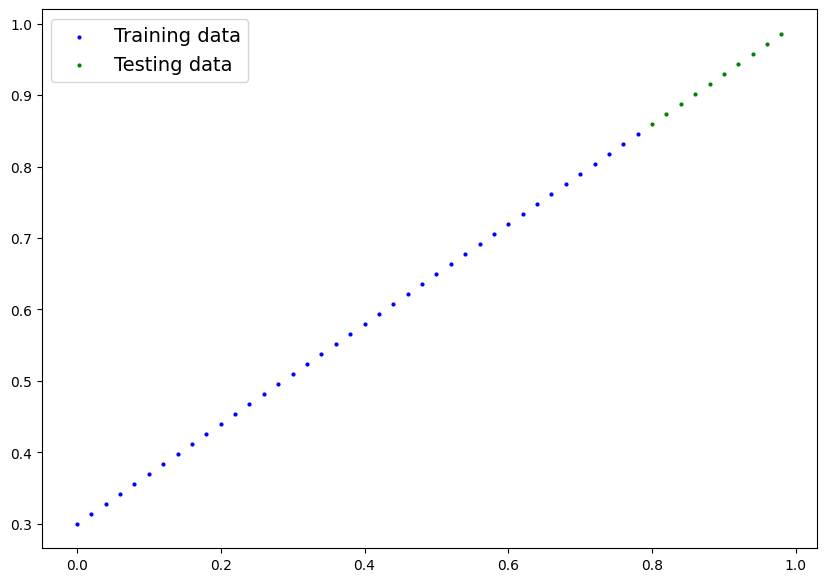

In [12]:
plot_predictions()

### Building PyTorch Model

what the model does
1. starts with random weights and bias
2. looks at the training data and adjustss the random values to bettee represent  (or get closer to) the ideal values

Through 2 main algos:
- Gradient Descent
- Backpropagation

In [13]:
# Create linear regression model class

class LinearRegressionModel(nn.Module):    #<- almost everything in python inherits from NN. module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    ##Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # <- 'x' is the imput data
      return self.weights * x + self.bias  #the linear regression formula


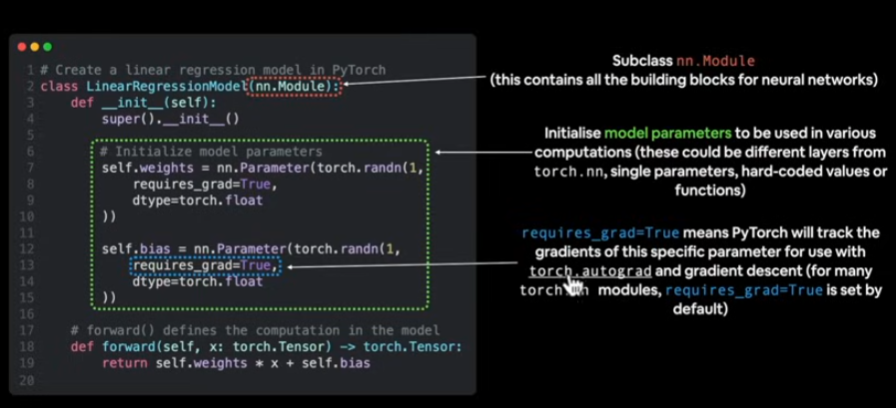